In [2]:
%matplotlib inline
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
get_ipython().run_line_magic('pylab', 'inline')
#sns.set_style("darkgrid")
pylab.rcParams['figure.figsize'] = (16, 8)
pylab.rcParams.update({'font.size': 10})

Populating the interactive namespace from numpy and matplotlib


In [7]:
df = xr.open_dataset("../experiment_results/2det4qubits")
df

<xarray.Dataset>
Dimensions:                  (angle: 3, iteration: 200, layer: 5, n_iters: 1, n_layers: 4, n_shots: 1, plusminus: 2, qubit: 5, run: 50)
Coordinates:
  * angle                    (angle) object 'theta' 'phi' 'lambda'
  * iteration                (iteration) int64 0 1 2 3 4 ... 195 196 197 198 199
  * layer                    (layer) int64 0 1 2 3 4
  * n_iters                  (n_iters) int64 200
  * n_layers                 (n_layers) int64 2 3 4 5
  * n_shots                  (n_shots) int64 1000
  * plusminus                (plusminus) int64 0 1
  * qubit                    (qubit) int64 0 1 2 3 4
  * run                      (run) int64 0 1 2 3 4 5 6 ... 43 44 45 46 47 48 49
Data variables:
    fidelity                 (n_iters, n_layers, n_shots, run, iteration, plusminus) float64 ...
    last_theta               (n_iters, n_layers, n_shots, run, layer, qubit, angle) float64 ...
    uncompiled_model_depth   (n_iters, n_layers, n_shots, run) int64 ...
    uncompiled

Text(0.5, 1.0, 'Fidelity improvement with optimiser iterations.   (Two determinants with four qubits)')

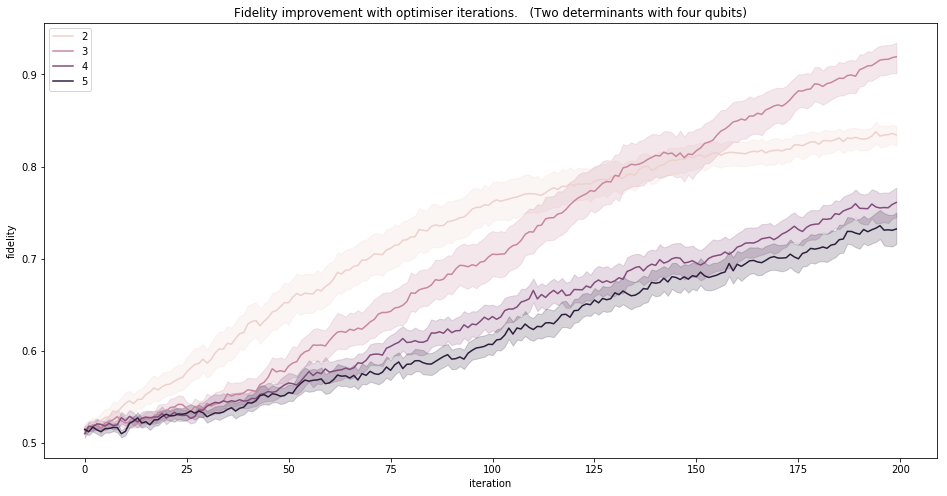

In [18]:
sns.lineplot(x='iteration', y='fidelity', hue='n_layers', data=df.fidelity.to_dataframe().reset_index())
plt.legend(df.n_layers.values)
plt.title("Fidelity improvement with optimiser iterations.   (Two determinants with four qubits)")

In [9]:
df.fidelity.max(dim="iteration").mean(dim='run')#.mean(dim='n_layers')

<xarray.DataArray 'fidelity' (n_iters: 1, n_layers: 4, n_shots: 1, plusminus: 2)>
array([[[[0.8635 , 0.86348]],

        [[0.94254, 0.94376]],

        [[0.81474, 0.82208]],

        [[0.79884, 0.80272]]]])
Coordinates:
  * n_iters    (n_iters) int64 200
  * n_layers   (n_layers) int64 2 3 4 5
  * n_shots    (n_shots) int64 1000
  * plusminus  (plusminus) int64 0 1

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

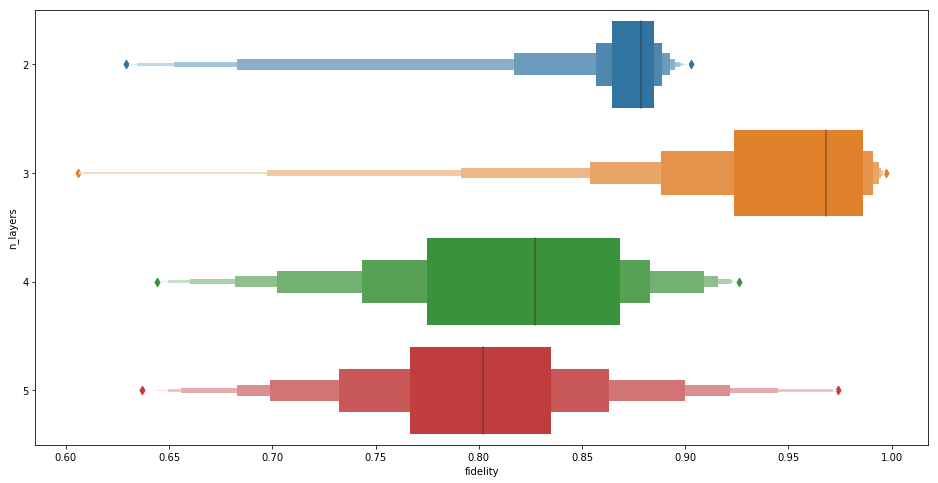

In [17]:
sns.boxenplot(orient='h', x='fidelity', y='n_layers', data=df.fidelity.max(dim='iteration').squeeze().to_dataframe().reset_index())


In [14]:
df.fidelity.max(dim='iteration').squeeze()

<xarray.DataArray 'fidelity' (n_layers: 4, run: 50, plusminus: 2)>
array([[[0.867, 0.87 ],
        [0.882, 0.895],
        ...,
        [0.88 , 0.895],
        [0.884, 0.897]],

       [[0.987, 0.98 ],
        [0.968, 0.979],
        ...,
        [0.843, 0.857],
        [0.971, 0.973]],

       [[0.774, 0.749],
        [0.777, 0.776],
        ...,
        [0.893, 0.883],
        [0.831, 0.845]],

       [[0.782, 0.812],
        [0.922, 0.923],
        ...,
        [0.682, 0.653],
        [0.77 , 0.785]]])
Coordinates:
    n_iters    int64 200
  * n_layers   (n_layers) int64 2 3 4 5
    n_shots    int64 1000
  * plusminus  (plusminus) int64 0 1
  * run        (run) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49